# Loops, Conditionals and Algorithmic Thinking Exercise 4B

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import requests
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import Normalize

In [2]:
df = pd.read_csv('DataAnalyst.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [3]:
df['Salary Estimate'] = df['Salary Estimate'].str.replace('K', '000')
df['Salary Estimate'] = df['Salary Estimate'].str.replace('$', '')
df['Salary Estimate'] = df['Salary Estimate'].str.replace('Glassdoor est.', '')
df[['Salary Min', 'Salary Max']] = df['Salary Estimate'].str.split('-', expand=True)

In [4]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Min,Salary Max
0,0,"Data Analyst, Center on Immigration and Justic...",37000-66000 (),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37000,66000 ()
1,1,Quality Data Analyst,37000-66000 (),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37000,66000 ()
2,2,"Senior Data Analyst, Insights & Analytics Team...",37000-66000 (),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37000,66000 ()
3,3,Data Analyst,37000-66000 (),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37000,66000 ()
4,4,Reporting Data Analyst,37000-66000 (),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37000,66000 ()


In [5]:
df = df.rename(columns={'Unnamed: 0': 'CASE.NO'})
df_replaced = df.replace('\n', ' ', regex=True)

df['Company Name'] = df['Company Name'].str.split('\n').str[0]
df['Company Name'] = df['Company Name'].str.strip()
df.head()   

,CASE.NO,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Min,Salary Max
0,0,"Data Analyst, Center on Immigration and Justic...",37000-66000 (),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37000,66000 ()
1,1,Quality Data Analyst,37000-66000 (),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37000,66000 ()
2,2,"Senior Data Analyst, Insights & Analytics Team...",37000-66000 (),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37000,66000 ()
3,3,Data Analyst,37000-66000 (),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37000,66000 ()
4,4,Reporting Data Analyst,37000-66000 (),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37000,66000 ()


In [19]:
df[['Salary Min', 'Salary Max']] = df['Salary Estimate'].str.split('-', expand=True)
df['Salary Estimate'] = df['Salary Estimate'].str.replace('Glassdoor est.', '')

df[['Salary Min', 'Salary Max']] = df[['Salary Min', 'Salary Max']].replace('Glassdoor est.', '')
df[['Salary Min', 'Salary Max']] = df[['Salary Min', 'Salary Max']].replace(r'\(|\)', '', regex=True)
df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'\(|\)', '', regex=True)
df['Salary Min'] = pd.to_numeric(df['Salary Min'], errors='coerce').fillna(0).astype(int)
df['Salary Max'] = pd.to_numeric(df['Salary Max'], errors='coerce').astype(int)
df['Salary Average'] = ((df['Salary Min'] + df['Salary Max']) / 2).astype(int)
df['Job Description'] = df['Job Description'].replace('\n', '', regex=True)
print(df.loc[df['Job Description'].str.contains('FANDUEL GROUP'), 'Job Description'].values[0])
df.head()  

ABOUT FANDUEL GROUPFanDuel Group is a world-class team of brands and products all built with one goal in mind — to give fans new and innovative ways to interact with their favorite games, sports, teams, and leagues. That's no easy task, which is why we're so dedicated to building a winning team. And make no mistake, we are here to win, but we believe in winning right. That means we'll never compromise when it comes to looking out for our teammates. From our many opportunities for professional development to our generous insurance and paid leave policies, we're committed to making sure our employees get as much out of FanDuel as we ask them to give.FanDuel Group is based in New York, with offices in California, New Jersey, Florida, Oregon and Scotland. Our brands include:FanDuel — A game-changing real-money fantasy sports appFanDuel Sportsbook — America's #1 sports betting appTVG — The best-in-class horse racing TV/media network and betting platformFanDuel Racing — A horse racing app bu

,CASE.NO,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Min,Salary Max,Salary Average
0,0,"Data Analyst, Center on Immigration and Justic...",37000-66000,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"NEW YORK, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37000,66000,51500
1,1,Quality Data Analyst,37000-66000,OverviewProvides analytical and technical supp...,3.8,Visiting Nurse Service of New York,"NEW YORK, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37000,66000,51500
2,2,"Senior Data Analyst, Insights & Analytics Team...",37000-66000,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"NEW YORK, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37000,66000,51500
3,3,Data Analyst,37000-66000,Requisition NumberRR-0001939Remote:YesWe colla...,4.1,Celerity,"NEW YORK, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37000,66000,51500
4,4,Reporting Data Analyst,37000-66000,ABOUT FANDUEL GROUPFanDuel Group is a world-cl...,3.9,FanDuel,"NEW YORK, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37000,66000,51500


In [8]:
max_salary = df['Salary Max'].max()
filtered = df[df['Salary Min'] > 1]
min_value = filtered['Salary Min'].min()
print(max_salary)
print(min_value)


190000
24000


C:\Users\USER\AppData\Local\Temp\ipykernel_34600\3709994953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Rating_round'] = df_filtered['Rating'].round()
C:\Users\USER\AppData\Local\Temp\ipykernel_34600\3709994953.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Rating_round'] = df_filtered['Rating'].round()


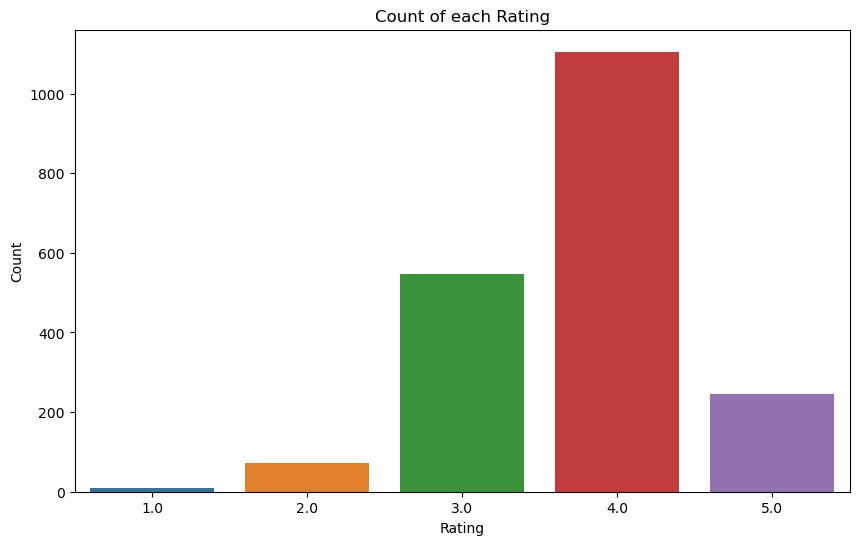

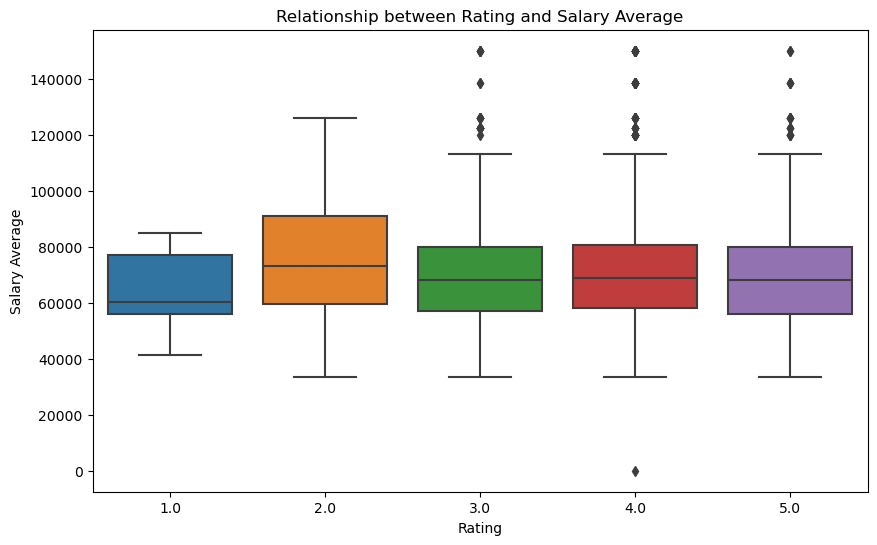

C:\Users\USER\AppData\Local\Temp\ipykernel_34600\3709994953.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues_r')


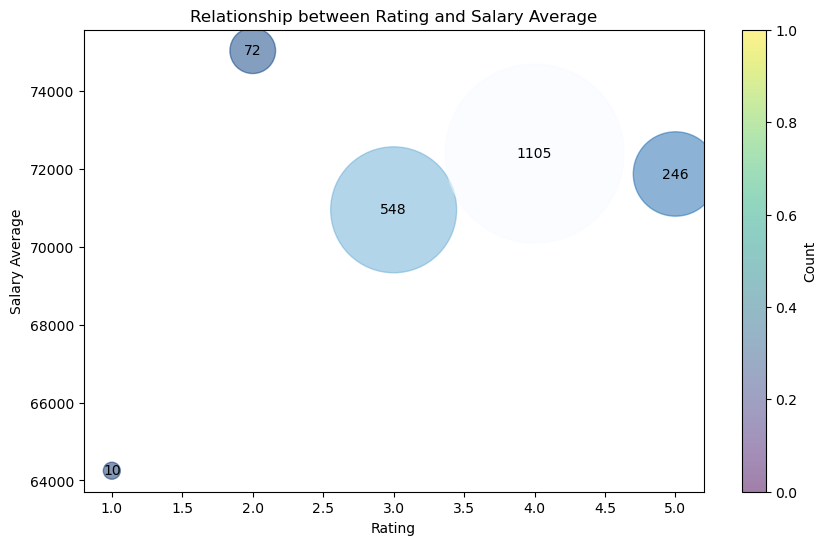

In [10]:
df_filtered = df.copy()
df_filtered = df[df['Rating'] != -1]
df_filtered['Rating_round'] = df_filtered['Rating'].round()
df_grouped = df_filtered.groupby('Rating_round').agg({'Salary Average': 'mean', 'Rating': 'count'}).reset_index()
df_grouped = df_grouped.rename(columns={'Rating': 'Rating Count'})
# 计算每个Rating的Salary Average和count
df_filtered['Rating_round'] = df_filtered['Rating'].round()
plt.figure(figsize=(10, 6))
sns.countplot(x=df_filtered['Rating_round'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of each Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['Rating_round'], y=df_filtered['Salary Average'])
plt.xlabel('Rating')
plt.ylabel('Salary Average')
plt.title('Relationship between Rating and Salary Average')
plt.show()
##
df_grouped = df_grouped.rename(columns={'Rating': 'Rating Count'})
cmap = cm.get_cmap('Blues_r')
norm = Normalize(vmin=df_grouped['Rating Count'].min(), vmax=df_grouped['Rating Count'].max())
fig, ax = plt.subplots(figsize=(10, 6))
sc = ax.scatter(df_grouped['Rating_round'], df_grouped['Salary Average'], s=df_grouped['Rating Count']*15, alpha=0.5, c=cmap(norm(df_grouped['Rating Count'])))
ax.set_xlabel('Rating')
ax.set_ylabel('Salary Average')
ax.set_title('Relationship between Rating and Salary Average')


for i in range(df_grouped.shape[0]):
    ax.text(df_grouped['Rating_round'].iloc[i], df_grouped['Salary Average'].iloc[i], df_grouped['Rating Count'].iloc[i], ha='center', va='center', color='black')

fig.colorbar(sc, ax=ax, label='Count')
plt.show()

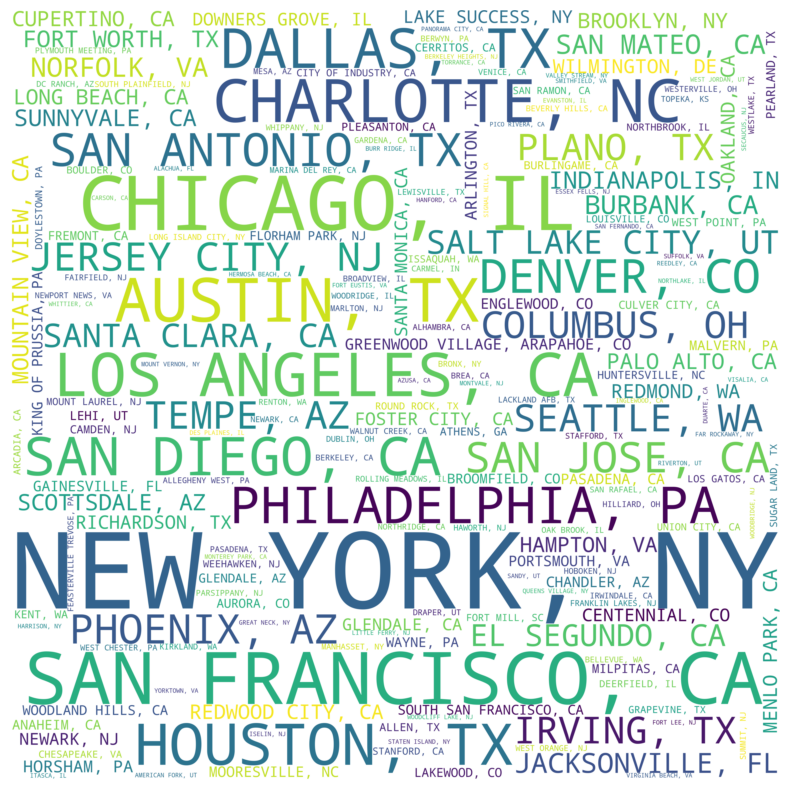

In [11]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df['Location'] = df['Location'].str.upper().replace(['ny', 'new york ny'], 'new york')

word_freq = Counter(df['Location'])

wordcloud = WordCloud(background_color='white', width=4000, height=4000,max_font_size=1000).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

2. Find numbers between 100 and 400 (both included) where each digit of a number is an even number. The numbers obtained should be printed in a comma-separated sequence.

C:\Users\USER\AppData\Local\Temp\ipykernel_34600\3150038319.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Counts', y='Sector', data=nth_max_sector_location_data, ci=None)


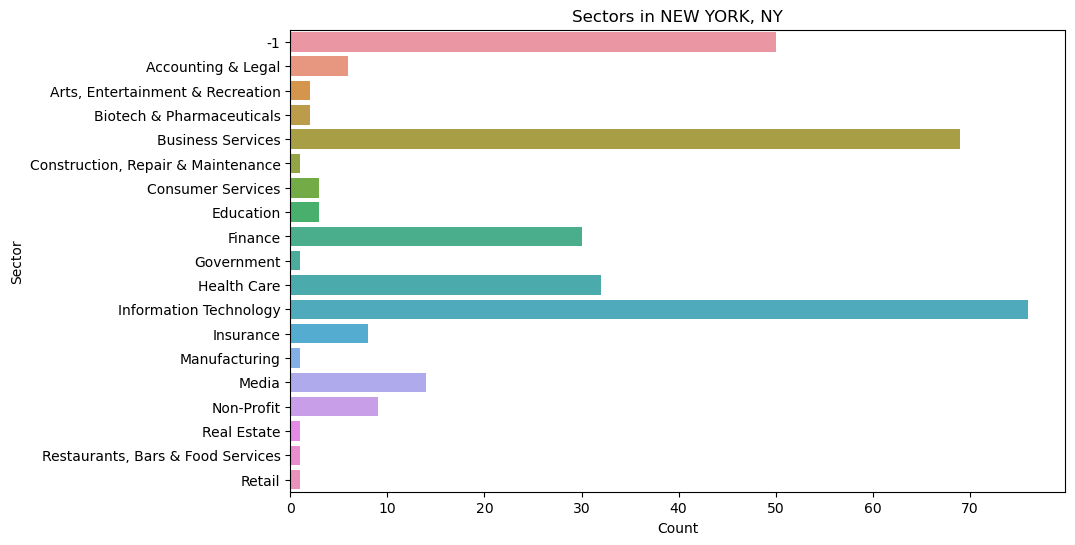

In [20]:
def plot_sector_counts(rank):
    
    sector_counts = df.groupby(['Location', 'Sector']).size().reset_index(name='Counts')
#計算每組的大小（即每個位置的部門數量）。結果是一個新的數據框，其中包含每個位置和部門的計數

    location_counts = sector_counts.groupby('Location')['Counts'].sum().reset_index()
    #

    sorted_location_counts = location_counts.sort_values(by='Counts', ascending=False)

    nth_max_sector_location = sorted_location_counts['Location'].iloc[rank-1]


    nth_max_sector_location_data = sector_counts[sector_counts['Location'] == nth_max_sector_location]

 
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Counts', y='Sector', data=nth_max_sector_location_data, ci=None)
    plt.xlabel('Count')
    plt.ylabel('Sector')
    plt.title(f'Sectors in {nth_max_sector_location}')
    plt.show()


plot_sector_counts(1)

In [13]:
sector_counts = df.groupby(['Location', 'Sector']).size()

sector_counts = sector_counts.sort_values(ascending=False)
print(sector_counts.head(50))


Location           Sector                
NEW YORK, NY       Information Technology    76
                   Business Services         69
                   -1                        50
SAN FRANCISCO, CA  Information Technology    47
NEW YORK, NY       Health Care               32
                   Finance                   30
CHARLOTTE, NC      Business Services         29
AUSTIN, TX         Information Technology    27
CHICAGO, IL        Business Services         27
                   Information Technology    24
SAN JOSE, CA       Information Technology    23
DENVER, CO         Information Technology    22
LOS ANGELES, CA    Information Technology    22
CHARLOTTE, NC      Information Technology    22
SAN FRANCISCO, CA  Business Services         22
CHICAGO, IL        -1                        21
HOUSTON, TX        Business Services         21
SAN FRANCISCO, CA  -1                        18
PHILADELPHIA, PA   Business Services         17
SAN ANTONIO, TX    Information Technology    1

In [14]:
 sector_counts = df.groupby(['Location', 'Sector']).size().reset_index(name='Counts')
location_counts = sector_counts.groupby('Location')['Counts'].sum().reset_index()
sorted_location_counts = location_counts.sort_values(by='Counts', ascending=False)
print(sorted_location_counts.head(50))

                            Location  Counts
154                     NEW YORK, NY     310
47                       CHICAGO, IL     130
200                SAN FRANCISCO, CA     119
13                        AUSTIN, TX      81
133                  LOS ANGELES, CA      80
44                     CHARLOTTE, NC      78
106                      HOUSTON, TX      72
54                        DALLAS, TX      66
198                    SAN DIEGO, CA      62
176                 PHILADELPHIA, PA      56
58                        DENVER, CO      47
196                  SAN ANTONIO, TX      45
201                     SAN JOSE, CA      38
177                      PHOENIX, AZ      35
118                  JERSEY CITY, NJ      33
225                        TEMPE, AZ      31
209                      SEATTLE, WA      30
111                       IRVING, TX      29
49                      COLUMBUS, OH      29
179                        PLANO, TX      28
206                  SANTA CLARA, CA      22
195       

In [15]:

average_salary_by_location = df.groupby('Location')['Salary Average'].mean().reset_index()

sorted_average_salary_by_location = average_salary_by_location.sort_values(by='Salary Average', ascending=False)

# 前50個地區的平均薪資
print(sorted_average_salary_by_location.head(50))

                  Location  Salary Average
155             NEWARK, CA   150000.000000
55           DALY CITY, CA   126000.000000
138         MARIN CITY, CA   126000.000000
134          LOS GATOS, CA   122666.666667
178        PICO RIVERA, CA   122500.000000
246           WHITTIER, CA   122500.000000
19            BERKELEY, CA   115500.000000
163         NORTHFIELD, IL   113000.000000
141            MAYWOOD, IL   113000.000000
68   ELK GROVE VILLAGE, IL   113000.000000
92            GLENVIEW, IL   113000.000000
201           SAN JOSE, CA   108855.263158
104            HOBOKEN, NJ   106000.000000
48    CITY OF INDUSTRY, CA   106000.000000
94          GREAT NECK, NY   106000.000000
248         WOODBRIDGE, NJ   106000.000000
53           CUPERTINO, CA   105884.615385
240        WEST ORANGE, NJ   105250.000000
206        SANTA CLARA, CA   104636.363636
210           SECAUCUS, NJ   104500.000000
75        FAR ROCKAWAY, NY   104500.000000
223          SUNNYVALE, CA   102781.250000
142        

C:\Users\USER\AppData\Local\Temp\ipykernel_34600\42836987.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Salary Average', y='Location', data=average_salaries_in_rank_range, ci=None)


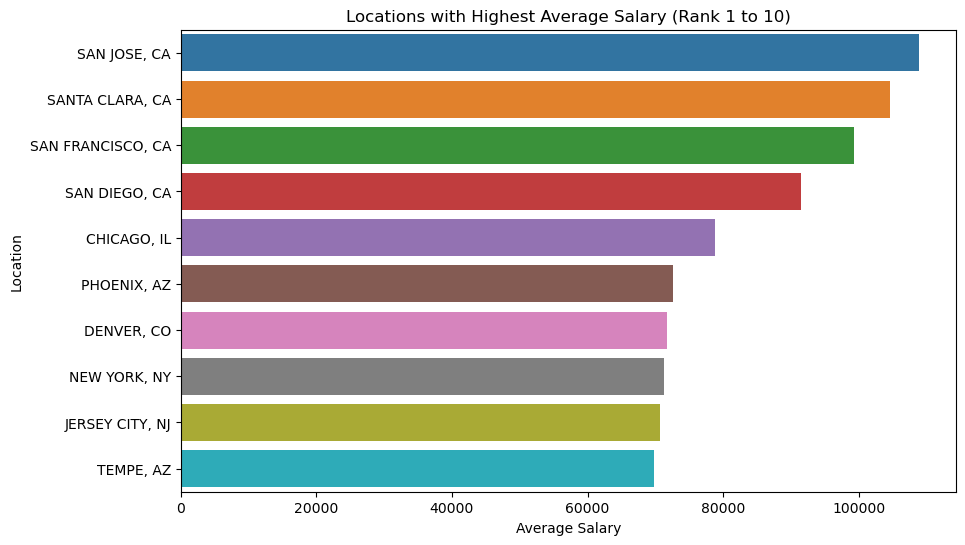

C:\Users\USER\AppData\Local\Temp\ipykernel_34600\42836987.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Salary Average', y='Location', data=average_salaries_in_rank_range, ci=None)


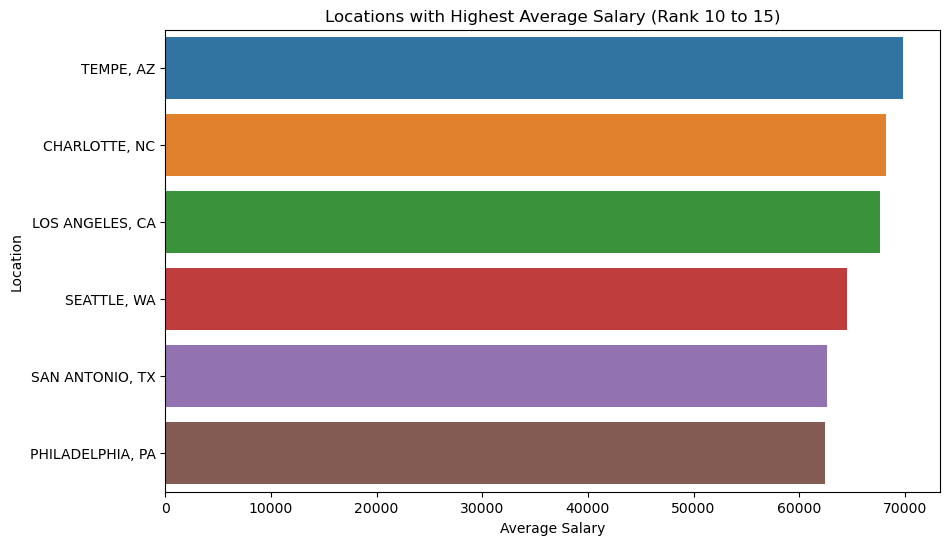

C:\Users\USER\AppData\Local\Temp\ipykernel_34600\42836987.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Salary Average', y='Location', data=average_salaries_in_rank_range, ci=None)


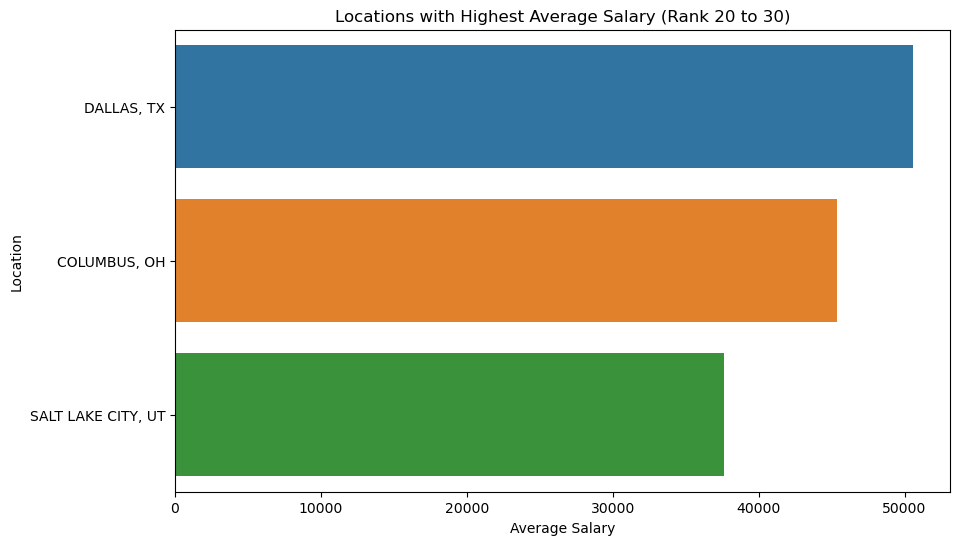

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_average_salaries(start_rank, end_rank):
    # 計算每個地區的樣本數
    location_counts = df['Location'].value_counts().reset_index()
    location_counts.columns = ['Location', 'Count']

    # 過濾出樣本數大於 (自己輸入) 的地區
    locations_with_enough_samples = location_counts[location_counts['Count'] > 20]['Location']

    # 計算每個地區的平均薪資
    average_salary_by_location = df[df['Location'].isin(locations_with_enough_samples)].groupby('Location')['Salary Average'].mean().reset_index()

    # 根據平均薪資對地區進行排序
    sorted_average_salary_by_location = average_salary_by_location.sort_values(by='Salary Average', ascending=False)

    # 取指定排名範圍的數據
    average_salaries_in_rank_range = sorted_average_salary_by_location.iloc[start_rank-1:end_rank]

    # 繪製棒形圖
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Salary Average', y='Location', data=average_salaries_in_rank_range, ci=None)
    plt.xlabel('Average Salary')
    plt.ylabel('Location')
    plt.title(f'Locations with Highest Average Salary (Rank {start_rank} to {end_rank})')
    plt.show()

plot_average_salaries(1, 10)


plot_average_salaries(10, 15)
plot_average_salaries(20, 30)

In [17]:
def get_salary_rank(location):
    # 計算每個地區的樣本數
    location_counts = df['Location'].value_counts().reset_index()
    location_counts.columns = ['Location', 'Count']

    # 過濾出樣本數大於20的地區
    locations_with_enough_samples = location_counts[location_counts['Count'] > 10]['Location']

    # 計算每個地區的平均薪資
    average_salary_by_location = df[df['Location'].isin(locations_with_enough_samples)].groupby('Location')['Salary Average'].mean().reset_index()

    # 根據平均薪資對地區進行排序
    sorted_average_salary_by_location = average_salary_by_location.sort_values(by='Salary Average', ascending=False).reset_index(drop=True)

    # 檢查該地區是否存在於 DataFrame 中
    if location in sorted_average_salary_by_location['Location'].values:
        # 獲取指定地區的排名
        rank = sorted_average_salary_by_location[sorted_average_salary_by_location['Location'] == location].index[0] + 1
        return rank
    else:
        return f'{location} does not exist in the DataFrame or does not have enough samples.'

# 調用函數，查看指定地區的平均薪資排名
location = 'IRVING, TX'  # 請將 'location' 替換為你的實際地區名稱
rank = get_salary_rank(location)
print(rank)

37
